In [1]:
%matplotlib inline
import quandl as q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py  
py.sign_in('oldzhangbuythings', 'j8IlrfpZl9qUbRXU3ZQm')
import plotly.tools as tls   
from plotly.graph_objs import *

In [2]:
hike_cycle = pd.read_csv('data_cleaned/rate_hike_circles.csv', index_col=0)
recession_cycle = pd.read_csv('data_cleaned/recession_circles.csv', index_col=0)

gdp_us = pd.read_csv('data_cleaned/real_gdp_index.csv', index_col=0)
gdp_us.index = gdp_us.index.to_datetime()
mask = (gdp_us.index >= '1978-01-03')
gdp_us = gdp_us[mask]

fed_rate = pd.read_csv('data_cleaned/effr_cleaned.csv', index_col=0)
fed_rate.index = fed_rate.index.to_datetime()
mask = (fed_rate.index >= '1978-01-03')
fed_rate = fed_rate[mask]

cpi_us = pd.read_csv('data_raw/cpi_rate.csv', index_col=0)
cpi_us.index = cpi_us.index.to_datetime()
mask = (cpi_us.index >= '1978-01-03')
cpi_us = cpi_us[mask]

dx = pd.read_csv('data_raw/dx_f_m.csv', index_col=0)
dx.index = dx.index.to_datetime()
mask = (dx.index >= '1978-01-03')
dx = dx[mask]

gold = pd.read_csv('data_raw/gc_f_m.csv', index_col=0)
gold.index = gold.index.to_datetime()
mask = (gold.index >= '1978-01-03')
gold = gold[mask]

un_rate = pd.read_csv('data_raw/un_rate_us.csv', index_col=0)
un_rate.index = un_rate.index.to_datetime()
mask = (un_rate.index >= '1978-01-03')
un_rate = un_rate[mask]


In [23]:
y10y2 = pd.read_csv('data_raw/T10Y2Y.csv', index_col=0)
y10y2.index = y10y2.index.to_datetime()
mask = (y10y2.T10Y2Y != '.')
y10y2 = y10y2[mask]
y10y2.T10Y2Y = y10y2.T10Y2Y.astype('float')


In [24]:
y10y2.iloc[10][0]

0.82999999999999996

In [6]:
sp500 = q.get('YAHOO/INDEX_GSPC')
mask_1 = (sp500.index >= '1978-01-03')
sp500 = sp500[mask_1]

vix_raw = q.get('YAHOO/INDEX_VIX', collapse='monthly')
dji_raw = q.get('YAHOO/INDEX_DJI')

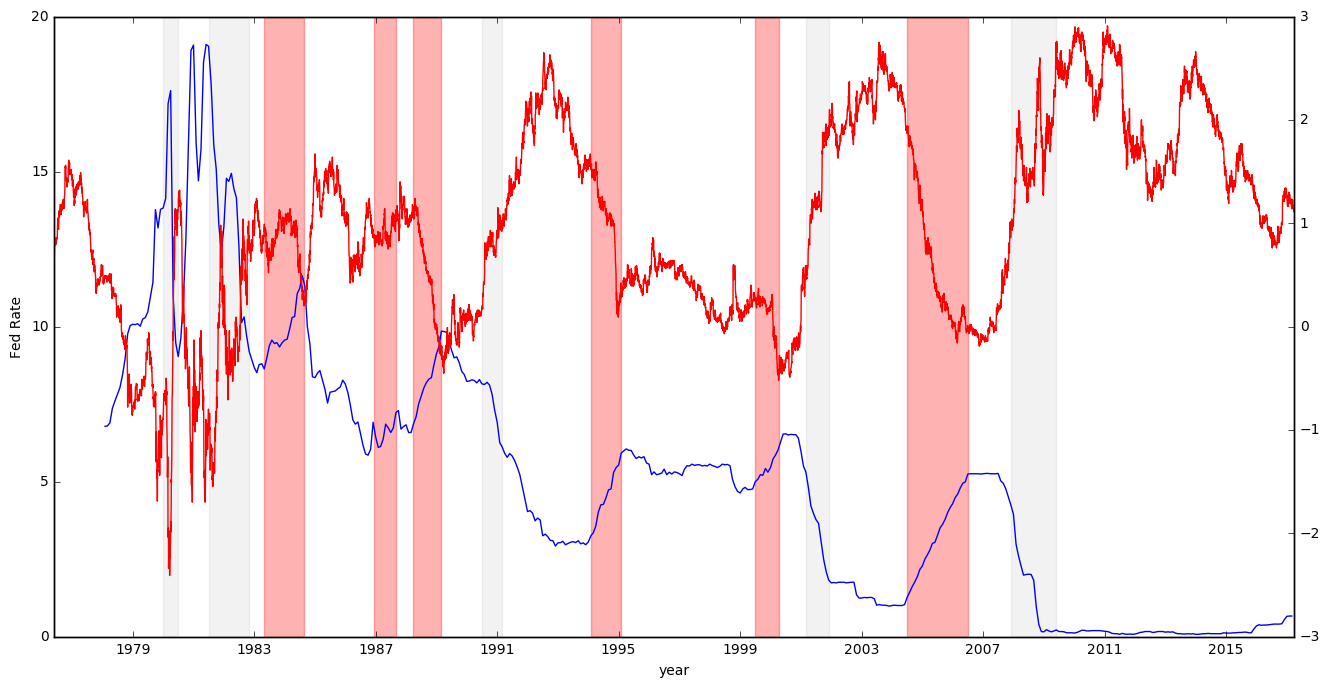

In [25]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(fed_rate.index, fed_rate.FEDFUNDS)
plt.xlabel('year')
plt.ylabel('Fed Rate')
for i in xrange(6):
    ax1.axvspan(hike_cycle.iloc[i, 0], hike_cycle.iloc[i, 1], alpha=0.3, color='red')
    if i < 5:
        ax1.axvspan(recession_cycle.iloc[i, 0], recession_cycle.iloc[i, 1], alpha=0.1, color='grey')
ax2 = ax1.twinx()
#ax2.plot(sp500.index, sp500['Adjusted Close'], 'r')
#ax2.plot(dji.index, dji['Adjusted Close'], 'r')    
#ax2.plot(vix.index, vix['Adjusted Close'], 'r')
#ax2.plot(dx.index, dx['Close'], 'r')
#ax2.plot(gd.index, gd['Close'], 'r')
#ax2.plot(un_rate.index, un_rate['UNRATE'], 'r')
#ax2.plot(un_rate.index, un_rate['UNRATE'], 'r')
ax2.plot(y10y2.index, y10y2['T10Y2Y'], 'r')

#ax2.plot(gdp_plot.DATE, gdp_plot.GDP, 'r')    
#py.iplot_mpl(fig, filename='fed_rates_hike')